# Artifacts

**Authors**:

 - Javi Rameerez javi@rameerez.com | [@rameerez [tw]](http://twitter.com/rameerez)

---

_This code is Open Source, released under a GPL License._

Artifacts are electric signals that are generated by anything other than groups of neurons. Electric interference is common in EEG. Most electric activity measured by the electrodes come from muscles near the face. For example, blinking or clenching the jaw generates huge spikes of electric activity.

We will try to identify + classify these artifacts in order to create some sort of control system.

## The artifacts dataset

This dataset contains approximately 4 minutes of EEG.

 - For the first minute, the subject blinked once every couple of seconds or so.
 - For the second minute, the subject clenched and relaxed his jaw every couple of seconds.
 - In the third minute, the subject looked at his left and immediately returned his eyes to a centered, relaxed position.
 - In the last minute, the subject looked at his right and immediately returned his eyes to a centered, relaxed position.
 
 These 4 artifacts (blinking, jaw, eye-to-left movement and eye-to-right movement) should be fairly visible in an EEG

In [6]:
import pandas as pd
import numpy as np
%matplotlib inline

In [7]:
df = pd.read_csv("data/4-artifacts-blink-jaw-eyesleft-eyesright-1-min-sequences-BBT-E16-AAA005-2019-11-29_18-22-04/EEG.csv")

In [8]:
df.head()

,timestamp,sequence,battery,flags,EEG-ch1,EEG-ch2,EEG-ch3,EEG-ch4,EEG-ch5,EEG-ch6,EEG-ch7,EEG-ch8,EEG-ch9,EEG-ch10,EEG-ch11,EEG-ch12,EEG-ch13,EEG-ch14,EEG-ch15,EEG-ch16
0,592607209591,41783,-2,0,8350.824174,4950.597800,8111.388236,3639.954337,-6300.628098,4645.772659,5363.435586,-23310.958747,-7559.437173,6957.695894,-2928.934973,-6864.917206,3416.628429,4359.856119,719.707099,8636.205336
1,592607209591,41783,-2,0,8350.702497,4949.782564,8111.157050,3638.786238,-6300.348241,4645.845666,5367.110230,-23309.741978,-7560.398421,6959.168186,-2928.642948,-6864.698187,3415.813194,4359.929126,718.100963,8634.416684
2,592607209591,41783,-2,0,8350.386137,4947.799230,8110.183634,3638.250859,-6301.917874,4640.881245,5357.704600,-23310.910076,-7561.055477,6949.178506,-2930.066569,-6865.768945,3419.560844,4360.294157,718.052293,8637.008404
3,592607209591,41783,-2,0,8350.848510,4948.492789,8110.585168,3640.453212,-6301.345992,4638.788401,5352.740180,-23309.206599,-7560.398421,6943.836888,-2926.404092,-6863.663933,3423.150315,4364.212155,722.590844,8641.206259
4,592607209591,41783,-2,0,8354.961191,4952.349949,8114.868197,3644.541559,-6297.221143,4644.981759,5361.440083,-23304.655880,-7555.543510,6951.794561,-2921.208486,-6857.993786,3425.620357,4370.502854,728.674692,8645.464953


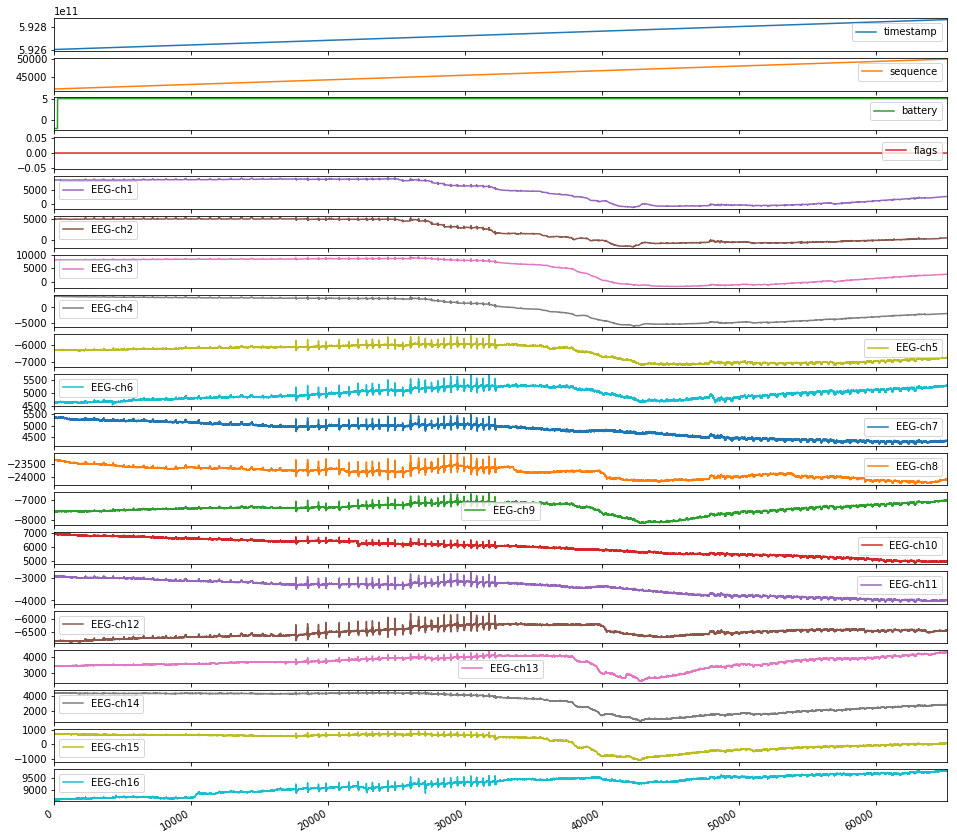

In [5]:
df.plot(subplots=True, figsize=(16, 16));

## Splitting the dataset

 - Minute 1: blinking
 - Minute 2: jaw clenching
 - Minute 3: eyes to left
 - Minute 4: eyes to right

### Blinking

In [9]:
samples_per_second = 256

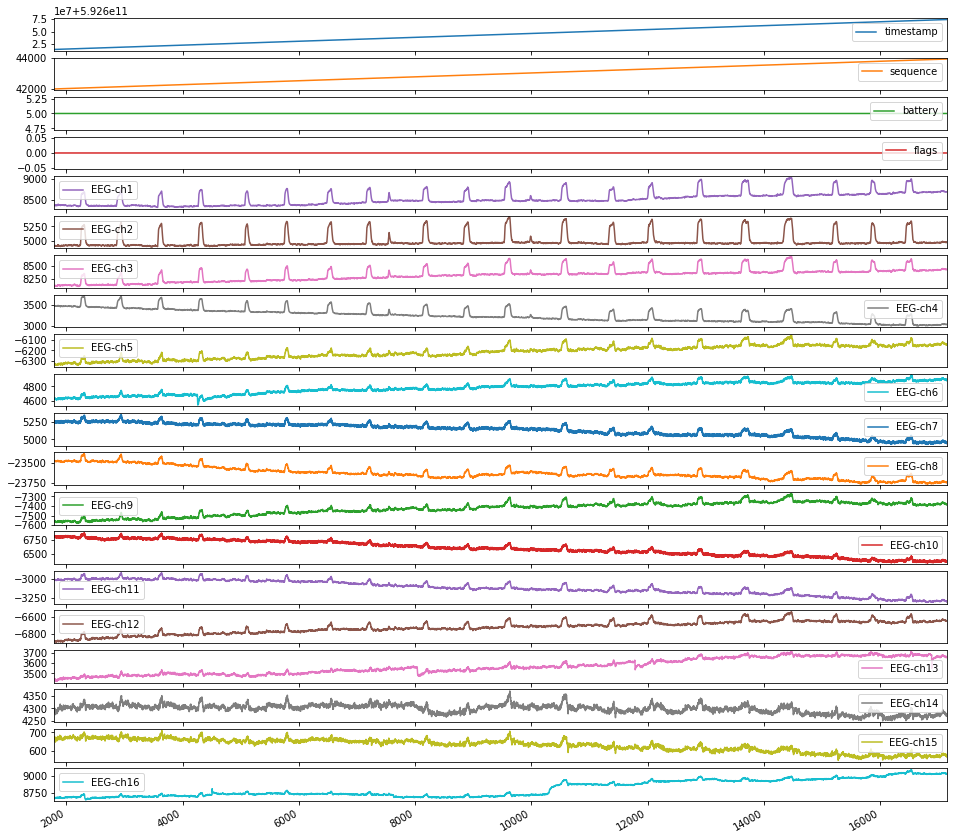

In [35]:
blinking_start_seconds = 7
blinking_end_seconds = blinking_start_seconds + 60

blinking_start_samples = blinking_start_seconds * samples_per_second
blinking_end_samples = blinking_end_seconds * samples_per_second

df_blinking = df[blinking_start_samples:blinking_end_samples]
df_blinking.plot(subplots=True, figsize=(16, 16));

### Jaw clenching

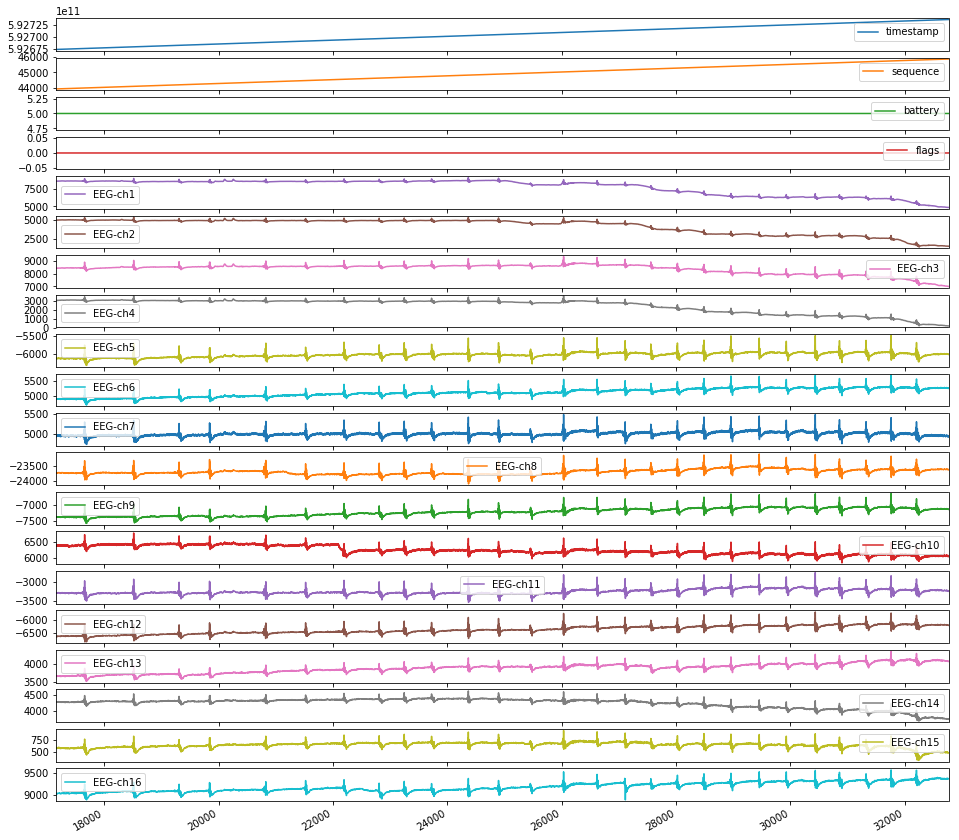

In [36]:
jaw_start_seconds = blinking_end_seconds
jaw_end_seconds = jaw_start_seconds + 61

jaw_start_samples = jaw_start_seconds * samples_per_second
jaw_end_samples = jaw_end_seconds * samples_per_second

df_jaw = df[jaw_start_samples:jaw_end_samples]
df_jaw.plot(subplots=True, figsize=(16, 16));

### Eye movement to the left and back to center

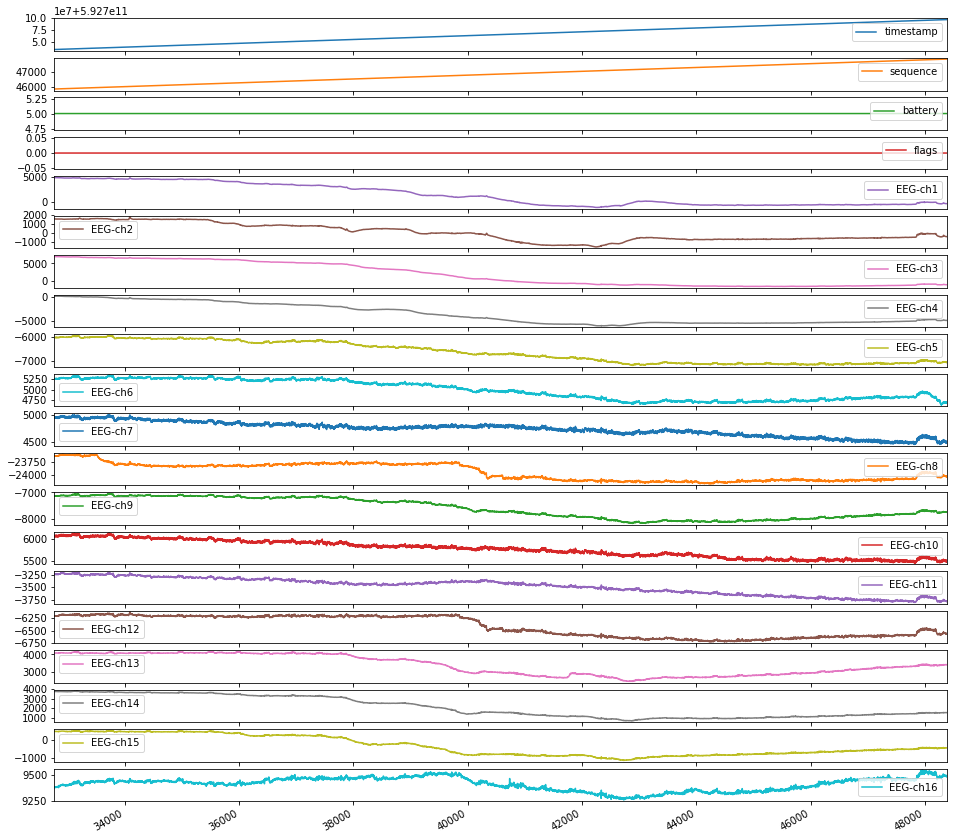

In [37]:
eyeleft_start_seconds = jaw_end_seconds
eyeleft_end_seconds = eyeleft_start_seconds + 61

eyeleft_start_samples = eyeleft_start_seconds * samples_per_second
eyeleft_end_samples = eyeleft_end_seconds * samples_per_second

df_eyeleft = df[eyeleft_start_samples:eyeleft_end_samples]
df_eyeleft.plot(subplots=True, figsize=(16, 16));

### Eye movement to the rightand back to center

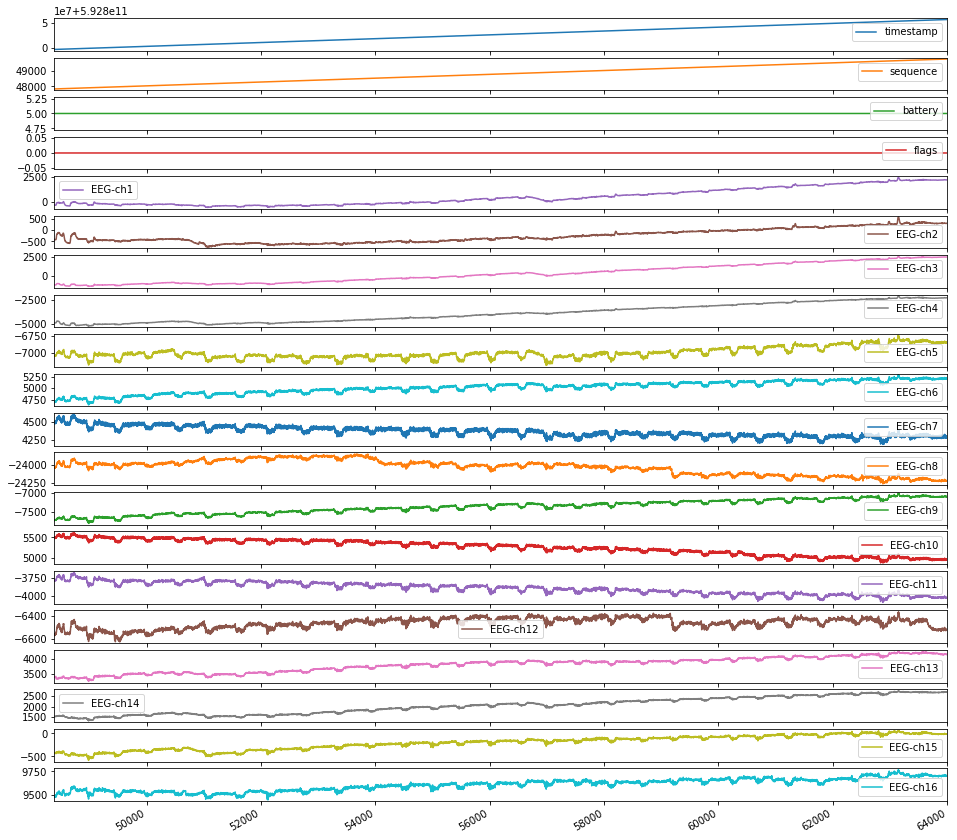

In [38]:
eyeright_start_seconds = eyeleft_end_seconds
eyeright_end_seconds = eyeright_start_seconds + 61

eyeright_start_samples = eyeright_start_seconds * samples_per_second
eyeright_end_samples = eyeright_end_seconds * samples_per_second

df_eyeright = df[eyeright_start_samples:eyeright_end_samples]
df_eyeright.plot(subplots=True, figsize=(16, 16));

## Save the artifacts datasets

In [40]:
save_path = 'data/4-artifacts-blink-jaw-eyesleft-eyesright-1-min-sequences-BBT-E16-AAA005-2019-11-29_18-22-04/'

df_blinking.to_pickle(save_path + 'blinking.pkl')
df_jaw.to_pickle(save_path + 'jaw.pkl')
df_eyeleft.to_pickle(save_path + 'eyeleft.pkl')
df_eyeright.to_pickle(save_path + 'eyeright.pkl')

## Load the artifacts datasets

In [128]:
save_path = 'data/4-artifacts-blink-jaw-eyesleft-eyesright-1-min-sequences-BBT-E16-AAA005-2019-11-29_18-22-04/'

df_blinking = pd.read_pickle(save_path + 'blinking.pkl')
df_jaw = pd.read_pickle(save_path + 'jaw.pkl')
df_eyeleft = pd.read_pickle(save_path + 'eyeleft.pkl')
df_eyeright = pd.read_pickle(save_path + 'eyeright.pkl')

## Data preparation

We need to feed the model with chunks of `n` readings.

We also need to divide our datasets into training and set dataframes.

In [150]:
def windowfy_dataset(dataframe, chunk_size=100, n_channels=16):
    n_chunks = dataframe.shape[0]-chunk_size
    
    windows = np.ndarray(shape=(n_chunks, chunk_size, n_channels), dtype=float)
    
    channels_array = []
    for i in range(1, n_channels+1):
        channels_array.append("EEG-ch" + str(i))
        
    dataframe_as_pd = dataframe[channels_array].to_numpy()
    
    for index in range(n_chunks):
        for j in range(chunk_size):
            windows[index][j] = dataframe_as_pd[index+j]
    
    return windows